# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [ ]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Temperature = [] 
Latitude = []
Longitude = []
Wind_Speed = []

count = 0

#for city in cities[:2]: 
#    while (count < 50):
 #       count =+ 1
#        print("a")
    try:
        quarry_url = requests.get(f'{url}appid={api_key}&q={city}&units={units}').json()
        time.sleep(1)
        print(quarry_url[:2])
        #print(quarry_url.keys())
        City.append(quarry_url['name'])
        Cloudiness.append(quarry_url['clouds']['all'])
        Country.append(quarry_url['sys']['country'])
        Date.append(quarry_url['dt'])
        Humidity.append(quarry_url['main']['humidity'])
        Temperature.append(quarry_url['main']['temp_max'])
        Longitude.append(quarry_url['coord']['lat'])
        Longitude.append(quarry_url['coord']['lon'])
        Wind_Speed.append(quarry_url['wind']['speed'])
    except KeyError:
        print("City not found. Skipping...")


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
quarry_url.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [ ]:
quarry_url.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [6]:
#Create Dataframe with City Data
weather_df = pd.DataFrame({"City":City,"Cloudiness":Cloudiness,"Country":Country,"Date":Date,"Humidity":Humidity,
                           "Latitude":Lat,"Longitude":Lng,"Max Temp":Temperature,"Wind Speed":Wind_Speed})
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rocha,36,UY,1563471086,71,-34.48,-54.34,61.61,6.35
1,Lagoa,0,PT,1563471250,60,37.14,-8.45,81.00,9.17
2,Souillac,0,FR,1563471250,56,45.60,-0.60,77.00,12.75
3,Nouadhibou,0,MR,1563471251,73,20.93,-17.03,71.60,26.40
4,Aasiaat,100,GL,1563471251,97,68.71,-52.87,42.35,7.38
5,Marawi,23,PH,1563471251,90,8.00,124.29,75.00,5.99
6,Bugojno,87,BA,1563471252,85,44.05,17.45,56.75,2.10
7,Sur,0,OM,1563471252,61,22.57,59.53,84.47,8.50
8,Vallenar,3,CL,1563471253,37,-28.58,-70.76,69.89,8.99
9,Hilo,40,US,1563471253,78,19.71,-155.08,75.00,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [28]:
#Create a function which develops plot

def plot_info(x=None, y=None):
    today = datetime.now()
    today_str = today.strftime('%m/%d/%Y')
    plt.title(f" {x}, vs. ,{y},{today_str}")

    x_array = weather_df[x]
    y_array = weather_df[y]
    
# Incorporate the other graph properties       
    plt.scatter(x_array,y_array)    
    plt.xlabel("Latitude")
    plt.ylabel("Mx Temperature (F)")
    plt.grid()
    
# Save Figure
    plt.savefig(f'image_{y}.png')
    
    plt.show()

#### Latitude vs. Temperature Plot

In [ ]:
print(plot_info('Lat', 'Max Temp'))

In [ ]:
plt.scatter(Lat,Temperature)


# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (07/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


# Incorporate a text label regarding circle size
#plt.text(45,35,"Note:\nCircle size correllates with driver count per city")

# Save Figure
plt.savefig("Image.CityMaxTemp.png")

plt.show()

#### Latitude vs. Humidity Plot

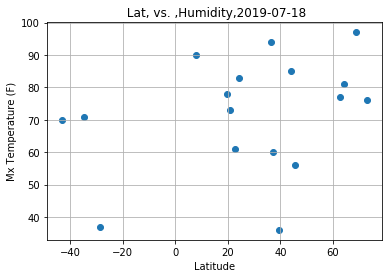

In [27]:
plot_info('Lat', 'Humidity')

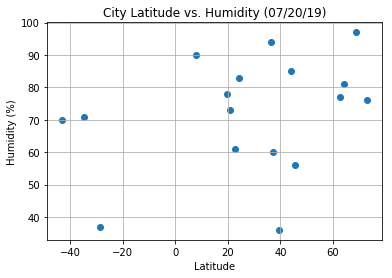

In [25]:
plt.scatter(Lat,Humidity)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save Figure
plt.savefig("CityHumidity.png")

plt.show()

In [ ]:
plt.scatter(Lat,Cloudiness)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (07/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save Figureplt.savefig("CityCloudiness.png")


plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
plt.scatter(Lat,Wind_Speed)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (07/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save Figure
#plt.savefig("CityWindSpeed.png")

plt.show()

#### Latitude vs. Wind Speed Plot

# Appraching the equator, weather conclusions:

1.
2.
3.
